In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import warnings 
warnings.filterwarnings("ignore")


In [3]:
#from google.colab import files
#Lang_uploaded = files.upload()

In [4]:
#import io
data = pd.read_csv('LanguageDetection.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'LanguageDetection.csv'

In [4]:
data.shape

(10337, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [6]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [7]:
len(data[data.duplicated()])

66

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(10271, 2)

In [10]:
data["Language"].nunique()

17

In [11]:
data["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

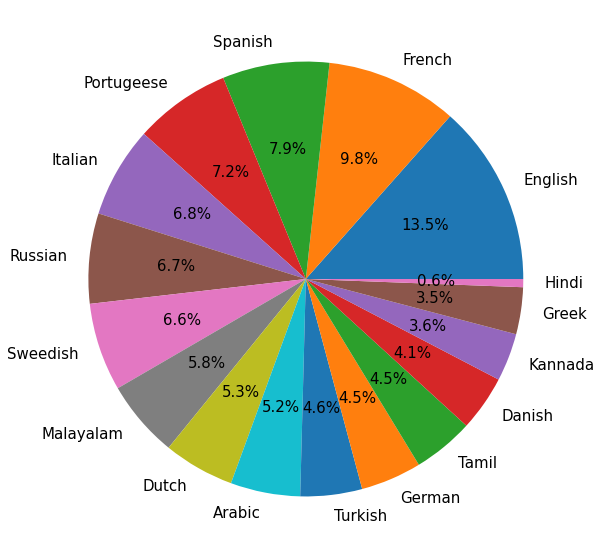

In [12]:
language = data["Language"].value_counts().reset_index()

plt.figure(figsize=(10,10))
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

In [13]:
data1 = data.copy()
data1["cleaned_Text"] = ""
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [14]:
def clean_func(Text):
  Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)   # removing the symbols and numbers
  Text = Text.lower()   # converting the text to lower case
  Text = re.sub('#\S+', '', Text)  # remove hashtags

  return Text 

In [15]:
data1["cleaned_Text"] = data1["Text"].apply(lambda x:clean_func(x))
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phy...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the onl...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human acti...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old f...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [16]:
X1 = data1["cleaned_Text"]
y1 = data1["Language"]

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y1)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
CV1 = CountVectorizer(max_features = 3000)
X1 = CV1.fit_transform(X1).toarray()

In [19]:
X1.shape

(10271, 3000)

In [20]:
print(X1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [22]:
X1_train.shape
X1_test.shape

(2568, 3000)

In [23]:
from sklearn.naive_bayes import MultinomialNB
models = {"LanguageDetection_Naive_Bayes" : MultinomialNB()}

In [24]:
for name, model in models.items():
    print( f'{name} training started...')
    model.fit(X1_train, y1_train)
    print(f'{name} trained.')

LanguageDetection_Naive_Bayes training started...
LanguageDetection_Naive_Bayes trained.


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
for name in models:
  acc_score1 = accuracy_score(y1_test, models.get(name).predict(X1_test))
  print(f'{name} accuracy score :  {acc_score1}')

LanguageDetection_Naive_Bayes accuracy score :  0.9524922118380063


In [27]:
def lang_prediction(text):
  x = CV1.transform([text]).toarray()  # converting text to bag of words model (Vector)
  lang = model.predict(x) # predicting the language
  lang = encoder.inverse_transform(lang) # finding the language corresponding to the predicted value
  return lang[0]  # printing the language

In [28]:
lang_prediction( "أنا أحب زكا وفريقها الرائع")

'Arabic'

In [146]:
lang_prediction("Rau is a good boy")

1

In [29]:
data_senti = pd.read_csv('Train_sentiment.csv')

In [30]:
data_senti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [31]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [32]:
data.drop_duplicates(inplace=True)

In [33]:
data_senti.shape

(40000, 2)

In [34]:
data_senti.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [35]:
#finding the positive and negative text in Data
pos=data_senti[data_senti['label']==1]
neg=data_senti[data_senti['label']==0]
print("Positive text \n",pos.head())
print("\nNegative text \n",neg.head())

Positive text 
                                                  text  label
4   Im a die hard Dads Army fan and nothing will e...      1
6   Finally watched this shocking movie last night...      1
8   It may be the remake of 1987 Autumn's Tale aft...      1
9   My Super Ex Girlfriend turned out to be a plea...      1
10  I can't believe people are looking for a plot ...      1

Negative text 
                                                 text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
5  A terrible movie as everyone has said. What ma...      0


Text(0.5, 1.0, 'Positive vs Negative')

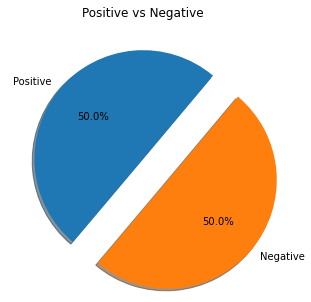

In [36]:
#Plotting the Postive vs Negative in piechart.
#Importing matplotlib library to plot pie chart.
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
temp=[pos['label'].count(),neg['label'].count()]
plt.pie(temp,labels=["Positive","Negative"],autopct ='%2.1f%%',shadow = True,startangle = 50,explode=(0, 0.3))
plt.title('Positive vs Negative')

In [37]:
#importing re library 
import re
#Defining preprocessing function to process the data
def preprocess(text):
        text=re.sub('<[^>]*>','',text)
        emoji=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
        text=re.sub('[\W]+',' ',text.lower()) +' '.join(emoji).replace('-','')
        return text 

In [38]:
#Applying the function preprocess on the data
data_senti['cleaned_text']=data_senti['text'].apply(preprocess)

In [39]:
data_senti.head()

,text,label,cleaned_text
0,I grew up (b. 1965) watching and loving the Th...,0,i grew up b 1965 watching and loving the thund...
1,"When I put this movie in my DVD player, and sa...",0,when i put this movie in my dvd player and sat...
2,Why do people who do not know what a particula...,0,why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,even though i have great interest in biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,im a die hard dads army fan and nothing will e...


In [40]:
#getting positive and negative data
positive_data = data_senti[ data_senti['label'] == 1]
positive_data = positive_data['text']
negative_data = data_senti[data_senti['label'] == 0]
negative_data= negative_data['text']

In [41]:
#Defining the function to plot the data in wordcloud
from wordcloud import WordCloud
def plot_wordcloud(data, color = 'white'):
    words = ' '.join(data)
    clean_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
    wordcloud = WordCloud(background_color=color,width=2500,height=2000).generate(clean_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


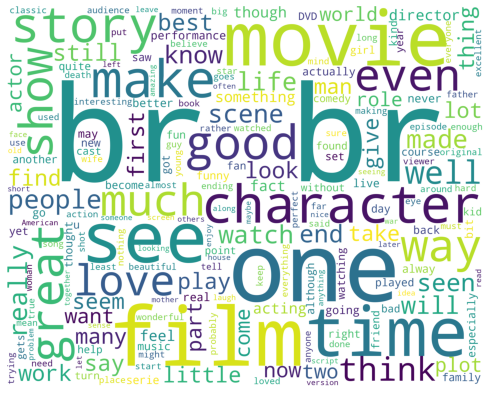

In [42]:
#Printing the positive data in wordcloud
print("Positive words")
plot_wordcloud(positive_data,'white')

Negative words


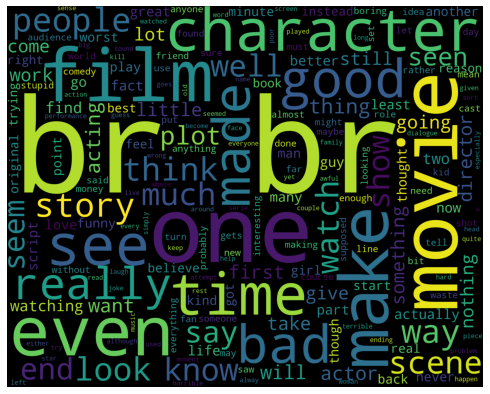

In [43]:
#Printing the negative data in wordcloud
print("Negative words")
plot_wordcloud(negative_data,'black')

In [44]:
X2 = data_senti["cleaned_text"]
y2 = data_senti["label"]

In [45]:
y2 = encoder.fit_transform(y2)

In [46]:
CV2 = CountVectorizer(max_features = 3000)
X2 = CV2.fit_transform(X2).toarray()

In [47]:
X2.shape

(40000, 3000)

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)

In [49]:
model2 = {"SentimentDetection_Naive_Bayes" : MultinomialNB()}

In [50]:
print(model2)

{'SentimentDetection_Naive_Bayes': MultinomialNB()}


In [51]:
for name, model in model2.items():
    print( f'{name} training started...')
    model.fit(X_train2, y_train2)
    print(f'{name} trained.')

SentimentDetection_Naive_Bayes training started...
SentimentDetection_Naive_Bayes trained.


In [52]:
X_train2.shape

(30000, 3000)

In [53]:
for name in model2:
  acc_score2 = accuracy_score(y_test2, model2.get(name).predict(X_test2))
  print(f'{name} accuracy score :  {acc_score2}')

SentimentDetection_Naive_Bayes accuracy score :  0.8323


In [179]:
def senti_prediction(text):
  x = CV2.transform([text]).toarray()  # converting text to bag of words model (Vector)
  senti = model.predict(x) # predicting the language
  senti = encoder.inverse_transform(senti) # finding the language corresponding to the predicted value
  return senti[0]  # printing the language

In [180]:
senti_prediction("He was joyful as he was working in good environment")

1

In [11]:
#Importing the required libraries
import re
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline
#Warnings get ignored
warnings.filterwarnings('ignore')

In [6]:
file="E:\shovo\Documents\Projects\WP_Chat_learning\Model_Creation\Datasets\WhatsApp_chat1.txt"
key="12hr"
split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }

In [7]:
#opening and reading a file
with open(file, 'r', encoding='utf-8') as raw_data:
    # converting the list split by newline char. as one whole string as there can be multi-line messages
    raw_string = ' '.join(raw_data.read().split('\n')) 
    # splits at all the date-time pattern, resulting in list of all the messages with user names
    user_msg = re.split(split_formats[key], raw_string) [1:]
    # finds all the date-time patterns
    date_time = re.findall(split_formats[key], raw_string) 
    # finds all the date-time patterns
    df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
    print(df)

                   date_time  \
0       26/01/20, 4:19 pm -    
1       24/01/20, 8:25 pm -    
2       26/01/20, 4:19 pm -    
3       26/01/20, 4:20 pm -    
4       26/01/20, 4:20 pm -    
...                      ...   
13474   02/10/20, 2:05 am -    
13475   02/10/20, 2:05 am -    
13476   02/10/20, 2:11 am -    
13477   02/10/20, 2:28 am -    
13478  02/10/20, 10:13 am -    

                                                user_msg  
0      Messages and calls are end-to-end encrypted. N...  
1      Tanay Kamath (TSEC, CS) created group "CODERS👨...  
2             You joined using this group's invite link   
3      +91 99871 38558 joined using this group's invi...  
4      +91 91680 38866 joined using this group's invi...  
...                                                  ...  
13474         Darshan Rander (TSEC, IT): MCQs mark kiya   
13475         Darshan Rander (TSEC, IT): Sign-in kiya😂😅   
13476         Tanay Kamath (TSEC, CS): Incognito se na?   
13477                    

In [211]:
# converting date-time pattern which is of type String to type datetime,
# format is to be specified for the whole string where the placeholders are extracted by the method 
df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
# split user and msg 
usernames = []
msgs = []
for i in df['user_msg']:
    a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
    if(a[1:]): # user typed messages
        usernames.append(a[1])
        msgs.append(a[2])
    else: # other notifications in the group(eg: someone was added, some left ...)
        usernames.append("group_notification")
        msgs.append(a[0])
# creating new columns         
df['user'] = usernames
df['message'] = msgs
# dropping the old user_msg col.
df.drop('user_msg', axis=1, inplace=True)   
df   

,date_time,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...
...,...,...,...
13657,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya
13658,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅
13659,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?
13660,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13479 entries, 0 to 13478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  13479 non-null  object
 1   user_msg   13479 non-null  object
dtypes: object(2)
memory usage: 210.7+ KB


In [213]:
df['language'] = (df['message'].apply(lambda x:lang_prediction(x)))

In [13]:
df

,date_time,user_msg
0,"26/01/20, 4:19 pm -",Messages and calls are end-to-end encrypted. N...
1,"24/01/20, 8:25 pm -","Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,"26/01/20, 4:19 pm -",You joined using this group's invite link
3,"26/01/20, 4:20 pm -",+91 99871 38558 joined using this group's invi...
4,"26/01/20, 4:20 pm -",+91 91680 38866 joined using this group's invi...
...,...,...
13474,"02/10/20, 2:05 am -","Darshan Rander (TSEC, IT): MCQs mark kiya"
13475,"02/10/20, 2:05 am -","Darshan Rander (TSEC, IT): Sign-in kiya😂😅"
13476,"02/10/20, 2:11 am -","Tanay Kamath (TSEC, CS): Incognito se na?"
13477,"02/10/20, 2:28 am -","Darshan Rander (TSEC, IT): Yup"


In [45]:
import pandas as pd
import emoji
emojis = []
for message in df['user_msg']:
    x = emoji.distinct_emoji_list(message)
    emojis.extend([c for c in x])

emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
#emoji_df.reset_index().rename(columns={'0': 'emoji', '1': 'frequency'})
emoji_df.columns = ['Emoji','Frequency']
emoji_df.index += 1
#pd.DataFrame.rename(columns={'0':'Emoji','1':'frequency'},inplace=True)
print(emoji_df)

    Emoji  Frequency
1       😂       1256
2       👍        220
3       😅        198
4       🔥        149
5       💯        120
..    ...        ...
283    💪🏼          1
284     🕜          1
285     ▶          1
286     ✍          1
287     😥          1

[287 rows x 2 columns]


In [12]:
#Adding extra helper columns for analysis and visualization
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

AttributeError: Can only use .dt accessor with datetimelike values

In [10]:
#Copying the file rto df1 
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

KeyError: "['year'] not found in axis"

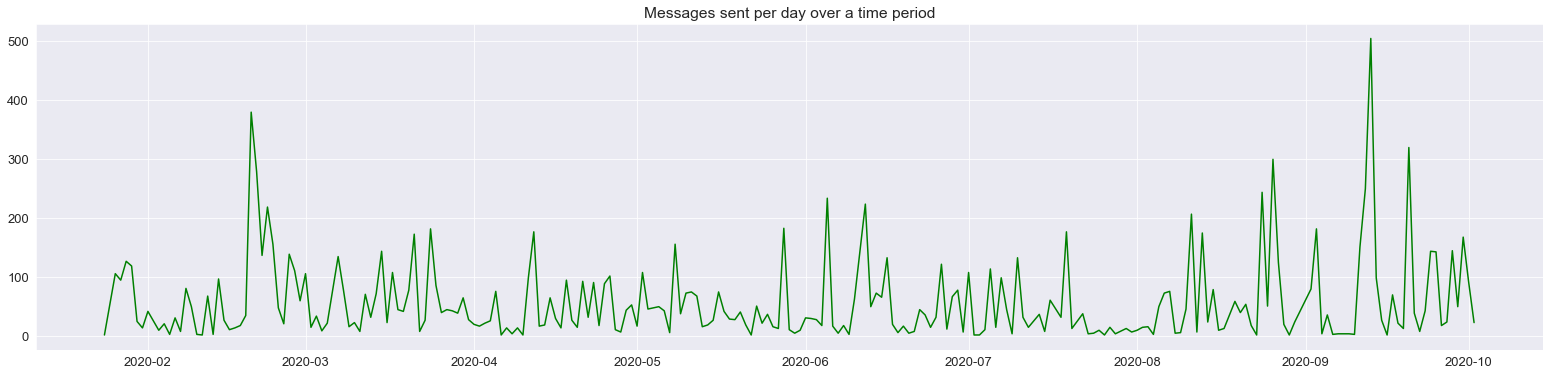

In [217]:
#Overall frequency of total messages on the group.

# Improving Default Styles using Seaborn
sns.set_style("darkgrid")
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`
# A basic plot
plt.plot(df1.date, df1.message_count,color="green")
plt.title('Messages sent per day over a time period');
# Could have used Seaborn's lineplot as well.
# sns.lineplot(df1.date, df1.message_count);   
# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

In [218]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,language,message_count
0,2020-09-13,230,504
1,2020-02-20,161,379
2,2020-09-20,168,319
3,2020-08-26,143,299
4,2020-02-21,142,278
5,2020-09-12,100,249
6,2020-08-24,100,243
7,2020-06-05,132,233
8,2020-06-12,103,223
9,2020-02-23,80,218


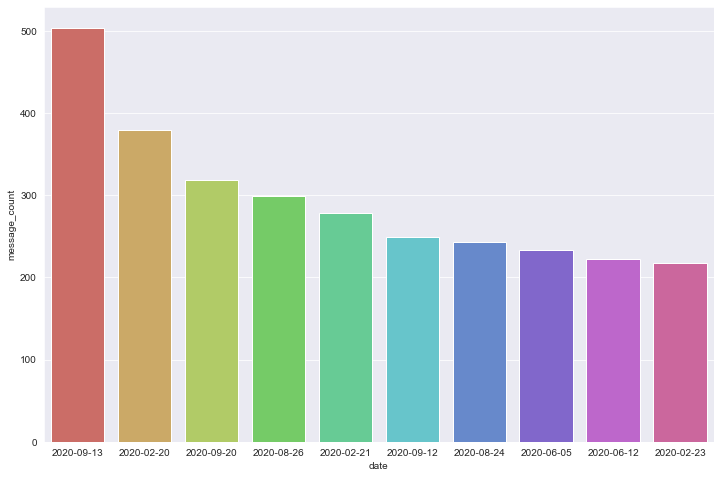

In [219]:
#plotting the graph for last 10 days
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)
# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count, palette="hls");
# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

In [220]:
# Total number of people who have sent at least one message on the group;
print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")   # `-1` because excluding "group_notficiation"
print(f"Number of people who haven't sent even a single message on the group are {237 - len(df.user.unique()) - 1}")

Total number of people who have sent at least one message on the group are 157
Number of people who haven't sent even a single message on the group are 78


In [221]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df
#df2

,user,message
0,"Tanay Kamath (TSEC, CS)",2528
1,"Dheeraj Lalwani (TSEC, CS)",1937
2,"Darshan Rander (TSEC, IT)",1404
3,"Kartik Soneji (TSEC, CS)",841
4,"Harsh Kapadia (TSEC IT, SE)",790
5,"Pratik K (TSEC CS, SE)",781
6,"Saurav Upoor (TSEC CS, SE)",569
7,Tushar Nankani,354
8,+91 82916 21138,275
9,"Farhan Irani (TSEC IT, SE)",255


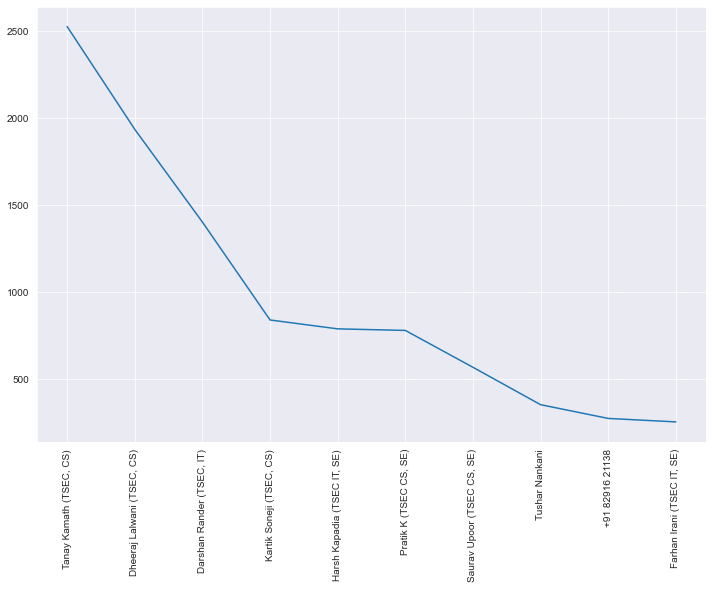

0        Tanay Kamath (TSEC, CS)
1     Dheeraj Lalwani (TSEC, CS)
2      Darshan Rander (TSEC, IT)
3       Kartik Soneji (TSEC, CS)
4    Harsh Kapadia (TSEC IT, SE)
5         Pratik K (TSEC CS, SE)
6     Saurav Upoor (TSEC CS, SE)
7                 Tushar Nankani
8                +91 82916 21138
9     Farhan Irani (TSEC IT, SE)
Name: user, dtype: object

In [222]:
# Beautifying Default Styles using Seaborn
#sns.set_style("darkgrid")
#sns.barplot(top10df.user, top10df.message, data=top10df);
fig, ax = plt.subplots()
ax.plot(top10df['user'],top10df['message'])
plt.xticks(rotation = 'vertical')
plt.show()
top10df.user

In [223]:
comment_words = ' '
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])
# iterate through the DataFrame.
for val in df2.message.values:
    # typecaste each val to string.
    val = str(val) 
    # split the value.
    tokens = val.split() 
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words)

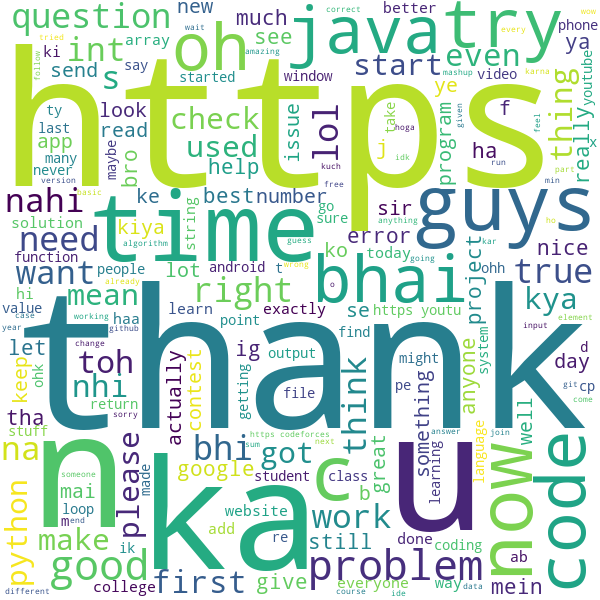

In [197]:
wordcloud.to_image()

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13662 entries, 0 to 13661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13662 non-null  datetime64[ns]
 1   user       13662 non-null  object        
 2   message    13662 non-null  object        
 3   language   13662 non-null  int64         
 4   day        13662 non-null  object        
 5   month      13662 non-null  object        
 6   year       13662 non-null  int64         
 7   date       13662 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 854.0+ KB


In [225]:
old_df = df.copy()
df_eng = old_df[old_df['language'] == 1]
df_other = old_df[old_df['language'] == 0]
old_df.shape[0]

13662

In [226]:
df3 = df_other.copy()    
df3 = df3[df3.user != "group_notification"]
top10df3 = df3.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df3 = top10df3.head(10).reset_index()
top10df3
#df2

,user,message
0,"Tanay Kamath (TSEC, CS)",1408
1,"Dheeraj Lalwani (TSEC, CS)",1031
2,"Darshan Rander (TSEC, IT)",816
3,"Pratik K (TSEC CS, SE)",465
4,"Harsh Kapadia (TSEC IT, SE)",428
5,"Kartik Soneji (TSEC, CS)",383
6,"Saurav Upoor (TSEC CS, SE)",328
7,Tushar Nankani,160
8,"Farhan Irani (TSEC IT, SE)",156
9,+91 88284 70904,133


In [227]:
df3.head()

,date_time,user,message,language,day,month,year,date
115,2020-01-27 19:31:00,"Dheeraj Lalwani (TSEC, CS)",Alright,0,Mon,Jan,2020,2020-01-27
120,2020-01-27 19:43:00,"Dheeraj Lalwani (TSEC, CS)",Yeah,0,Mon,Jan,2020,2020-01-27
121,2020-01-27 19:44:00,"Dheeraj Lalwani (TSEC, CS)",Something or the other So that we can build o...,0,Mon,Jan,2020,2020-01-27
127,2020-01-27 20:37:00,+91 96536 93868,We'll try posting our codes at 10 pm ...,0,Mon,Jan,2020,2020-01-27
129,2020-01-27 20:39:00,"Dheeraj Lalwani (TSEC, CS)",Alright,0,Mon,Jan,2020,2020-01-27


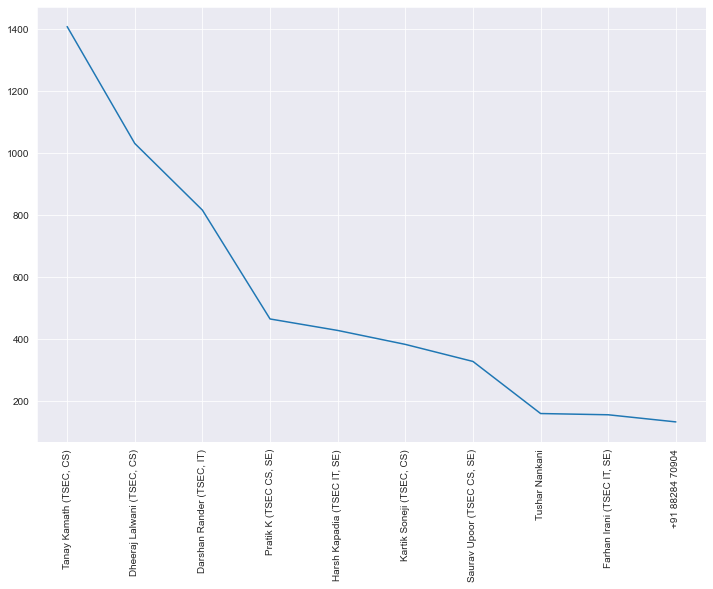

0        Tanay Kamath (TSEC, CS)
1     Dheeraj Lalwani (TSEC, CS)
2      Darshan Rander (TSEC, IT)
3         Pratik K (TSEC CS, SE)
4    Harsh Kapadia (TSEC IT, SE)
5       Kartik Soneji (TSEC, CS)
6     Saurav Upoor (TSEC CS, SE)
7                 Tushar Nankani
8     Farhan Irani (TSEC IT, SE)
9                +91 88284 70904
Name: user, dtype: object

In [153]:
fig, ax = plt.subplots()
ax.plot(top10df3['user'],top10df3['language'])
plt.xticks(rotation = 'vertical')
plt.show()
top10df3.user

In [228]:
df_eng['sentiment'] = df_eng['message'].apply(lambda x:senti_prediction(x))

In [229]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6268 entries, 0 to 13661
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  6268 non-null   datetime64[ns]
 1   user       6268 non-null   object        
 2   message    6268 non-null   object        
 3   language   6268 non-null   int64         
 4   day        6268 non-null   object        
 5   month      6268 non-null   object        
 6   year       6268 non-null   int64         
 7   date       6268 non-null   object        
 8   sentiment  6268 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 489.7+ KB


In [231]:
df4 = df_eng.copy()
df4 = df_eng[df_eng['sentiment']==0]
df4 = df4[df4.user != "group_notification"]
top10df4 = df4.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df4 = top10df4.head(10).reset_index()
top10df4
#df2

,user,message
0,"Tanay Kamath (TSEC, CS)",711
1,"Dheeraj Lalwani (TSEC, CS)",516
2,"Darshan Rander (TSEC, IT)",368
3,"Kartik Soneji (TSEC, CS)",280
4,"Harsh Kapadia (TSEC IT, SE)",210
5,"Pratik K (TSEC CS, SE)",170
6,"Saurav Upoor (TSEC CS, SE)",105
7,+91 82916 21138,96
8,+91 97681 67131,84
9,Tushar Nankani,70


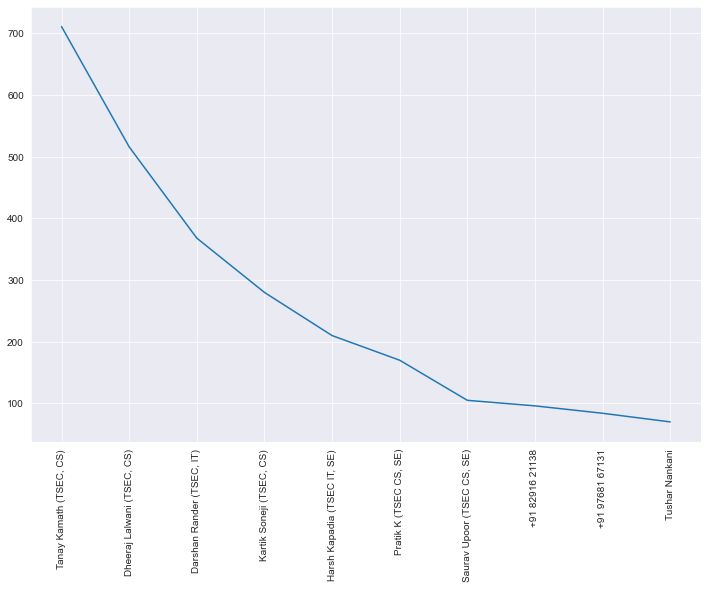

0        Tanay Kamath (TSEC, CS)
1     Dheeraj Lalwani (TSEC, CS)
2      Darshan Rander (TSEC, IT)
3       Kartik Soneji (TSEC, CS)
4    Harsh Kapadia (TSEC IT, SE)
5         Pratik K (TSEC CS, SE)
6     Saurav Upoor (TSEC CS, SE)
7                +91 82916 21138
8                +91 97681 67131
9                 Tushar Nankani
Name: user, dtype: object

In [234]:
fig, ax = plt.subplots()
ax.plot(top10df4['user'],top10df4['message'])
plt.xticks(rotation = 'vertical')
plt.show()
top10df4.user